# Metrics and Plots for the trained models

In [1]:
MAIN_DUMP='../../dump/'
import os,sys
from joblib import Parallel, delayed,dump,load

sys.path.append(os.path.abspath('../../src/ml'))
from load_matrix import load_df
from model_trainer import MLModel
from utils import load_models

import pandas as pd

from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer


## v2.10

In [3]:
current_version='v2.10'
standard_models=load_models('../../dump',version=current_version,normalization='standard')
robust_models=load_models('../../dump',version=current_version,normalization='robust')
none_models =load_models('../../dump',version=current_version,normalization='none')

ValueError: <class 'numpy.random._mt19937.MT19937'> is not a known BitGenerator module.

In [80]:
collector = ResultsCollector()
metrics_list = []
metrics_list=[]
for norm in ['none','robust','standard']:
        current_dict=eval(f"{norm}_models")
        for model_name, ml_model in current_dict.items():
                print(f'-- Evaluating model: {model_name} {current_version} {norm} --')
                y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
                metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
                metrics_list.append({
                        "model": ml_model.model_type,
                        "input": ml_model.dataset_name,
                        "normalization": norm,  
                        "version": current_version,
                        **metrics
                })

                collector.add(ml_model.model_type, ml_model.dataset_name, y_test, y_pred, y_proba)
results=pd.DataFrame(metrics_list)
results.loc[results['input']=='gene_expression', 'version'] = ''

-- Evaluating model: random_forest_Complex_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_Complex_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_concatenated_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_gene_expression_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_RGCN_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_RGCN_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: sklearn_mlp_Complex_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: sklearn_mlp_Complex_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: sklearn_mlp_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluatin

In [81]:
results[results['input']=='gene_expression']

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
4,random_forest,gene_expression,none,,0.785714,0.896552,1.0,0.945455,0.715762,0.994505,0.998575,0.077027
11,sklearn_mlp,gene_expression,none,,0.500000,0.787879,1.0,0.881356,0.000000,0.587912,0.822746,0.167189
18,svm,gene_expression,none,,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.007722
25,xgboost,gene_expression,none,,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.030040


In [82]:
results_10=results

In [89]:
results['input'].unique()

array(['Complex_protein_embeddings', 'Complex_sample_embeddings',
       'concatenated_protein_embeddings',
       'concatenated_sample_embeddings', 'gene_expression',
       'RGCN_protein_embeddings', 'RGCN_sample_embeddings'], dtype=object)

## v2.11

In [83]:
current_version='v2.11'
standard_models=load_models('../dump',version=current_version,normalization='standard')
robust_models=load_models('../dump',version=current_version,normalization='robust')
none_models =load_models('../dump',version=current_version,normalization='none')

collector = ResultsCollector()
metrics_list = []
metrics_list=[]
for norm in ['none','robust','standard']:
        current_dict=eval(f"{norm}_models")
        for model_name, ml_model in current_dict.items():
                print(f'-- Evaluating model: {model_name} {current_version} {norm} --')
                y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
                metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
                metrics_list.append({
                        "model": ml_model.model_type,
                        "input": ml_model.dataset_name,
                        "normalization": norm,  
                        "version": current_version,
                        **metrics
                })

                collector.add(ml_model.model_type, ml_model.dataset_name, y_test, y_pred, y_proba)
results=pd.DataFrame(metrics_list)
results.loc[results['input']=='gene_expression', 'version'] = ''

-- Evaluating model: random_forest_Complex_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_Complex_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_concatenated_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_concatenated_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_gene_expression_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_RGCN_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_RGCN_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: sklearn_mlp_Complex_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: sklearn_mlp_Complex_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: sklearn_mlp_concatenated_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluatin

In [84]:
results_11=results

### saving csv

In [ ]:
results_10.to_csv('../../results/tables/scores_v2.10.csv',index=False)
results_11.to_csv('../../results/tables/scores_v2.11.csv',index=False)

all_results=pd.concat([results_10,results_11],axis=0)
all_results.to_csv('../../results/tables/scores_all.csv',index=False)

### analysis

In [94]:
from IPython.display import display
display(results_10)

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
0,random_forest,Complex_protein_embeddings,none,v2.10,0.980769,1.000000,0.961538,0.980392,0.917249,1.000000,1.000000,0.034265
1,random_forest,Complex_sample_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.379121,0.752217,0.197538
2,random_forest,concatenated_protein_embeddings,none,v2.10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.029705
3,random_forest,concatenated_sample_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.637363,0.904219,0.173510
4,random_forest,gene_expression,none,,0.785714,0.896552,1.000000,0.945455,0.715762,0.994505,0.998575,0.077027
5,random_forest,RGCN_protein_embeddings,none,v2.10,0.604396,0.827586,0.923077,0.872727,0.261528,0.851648,0.961477,0.129460
6,random_forest,RGCN_sample_embeddings,none,v2.10,0.675824,0.857143,0.923077,0.888889,0.400941,0.675824,0.840949,0.165363
7,sklearn_mlp,Complex_protein_embeddings,none,v2.10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010919
8,sklearn_mlp,Complex_sample_embeddings,none,v2.10,0.480769,0.781250,0.961538,0.862069,-0.091725,0.362637,0.738561,0.206757
9,sklearn_mlp,concatenated_protein_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.500000,0.787879,0.212121


In [86]:
datasets=['Complex_protein_embeddings','RGCN_protein_embeddings']
temp_df=all_results[all_results['input'].isin(datasets)].sort_values(by=['input','model','version','normalization'])

In [87]:
df=temp_df
df

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
28,pytorch_mlp,Complex_protein_embeddings,robust,v2.10,0.928571,0.962963,1.000000,0.981132,0.908514,0.901099,0.946532,0.035927
28,pytorch_mlp,Complex_protein_embeddings,robust,v2.11,0.818681,0.923077,0.923077,0.923077,0.637363,0.821429,0.914203,0.108078
0,random_forest,Complex_protein_embeddings,none,v2.10,0.980769,1.000000,0.961538,0.980392,0.917249,1.000000,1.000000,0.034265
32,random_forest,Complex_protein_embeddings,robust,v2.10,0.857143,0.928571,1.000000,0.962963,0.814411,0.884615,0.964502,0.115535
40,random_forest,Complex_protein_embeddings,standard,v2.10,0.642857,0.838710,1.000000,0.912281,0.489522,0.719780,0.913945,0.155304
0,random_forest,Complex_protein_embeddings,none,v2.11,0.909341,0.961538,0.961538,0.961538,0.818681,0.994505,0.998575,0.056821
32,random_forest,Complex_protein_embeddings,robust,v2.11,0.695055,0.862069,0.961538,0.909091,0.488645,0.747253,0.866301,0.131876
40,random_forest,Complex_protein_embeddings,standard,v2.11,0.500000,0.787879,1.000000,0.881356,0.000000,0.829670,0.946098,0.146622
7,sklearn_mlp,Complex_protein_embeddings,none,v2.10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010919
34,sklearn_mlp,Complex_protein_embeddings,robust,v2.10,0.695055,0.862069,0.961538,0.909091,0.488645,0.741758,0.871262,0.110793


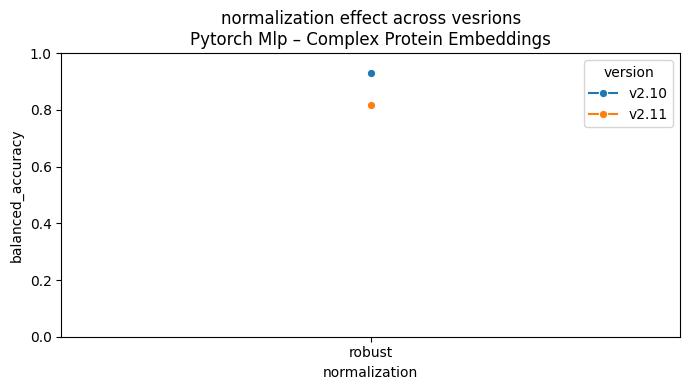

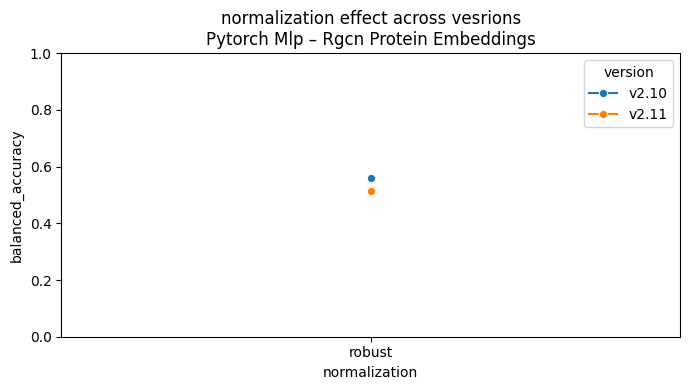

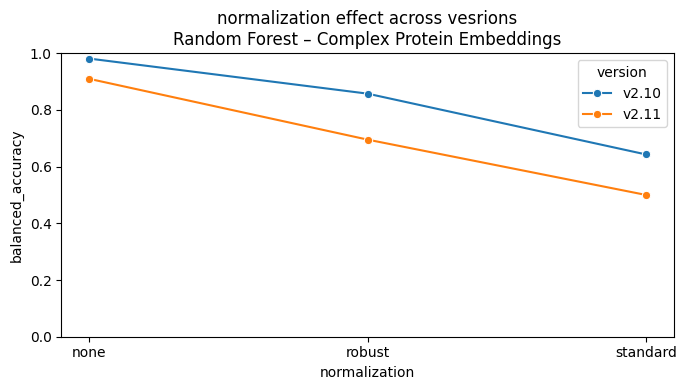

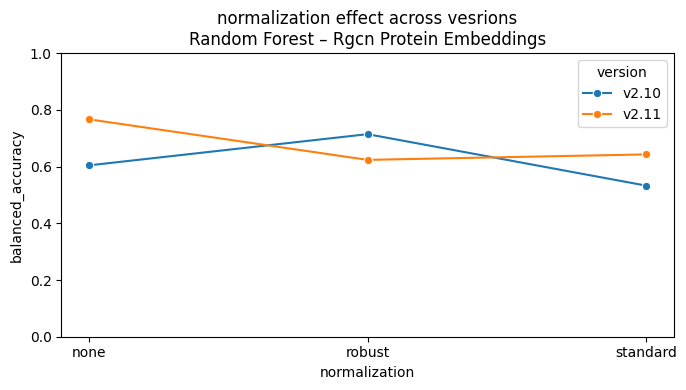

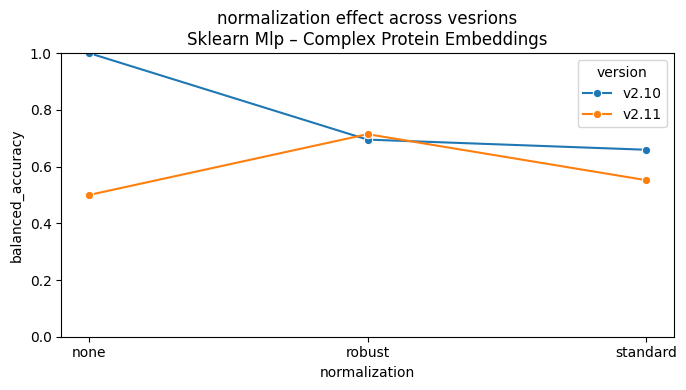

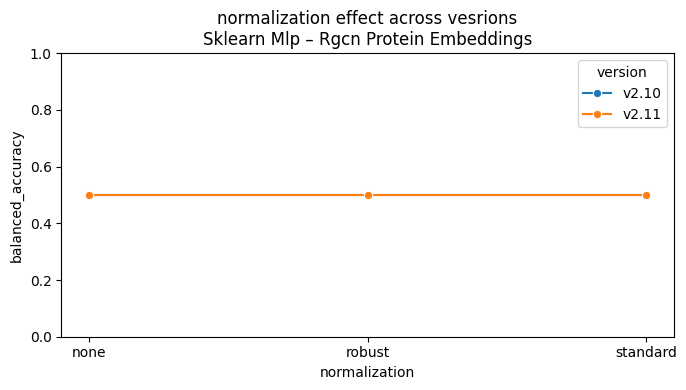

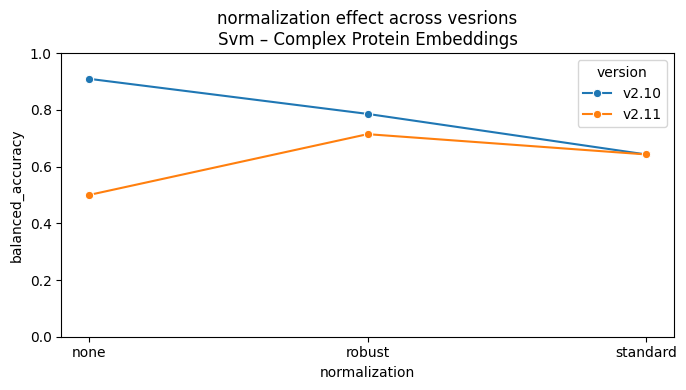

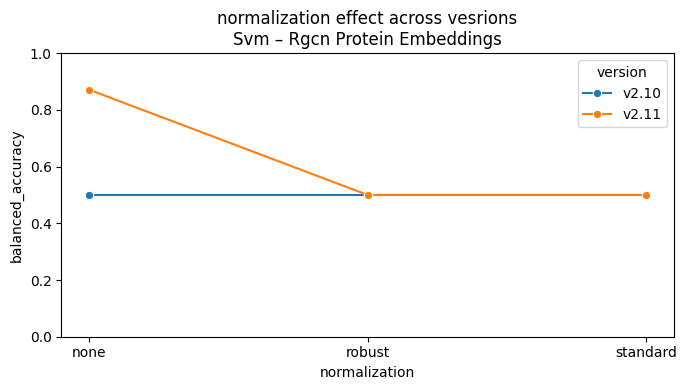

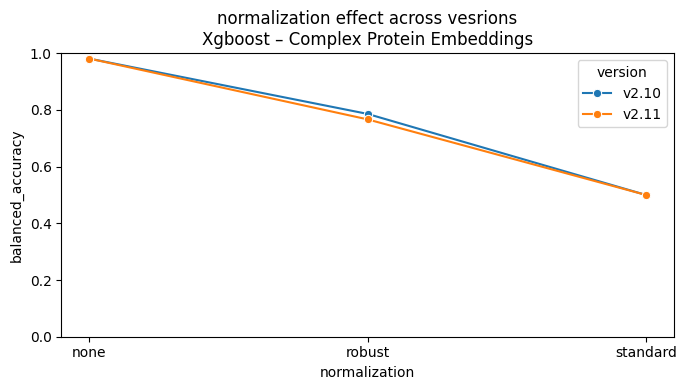

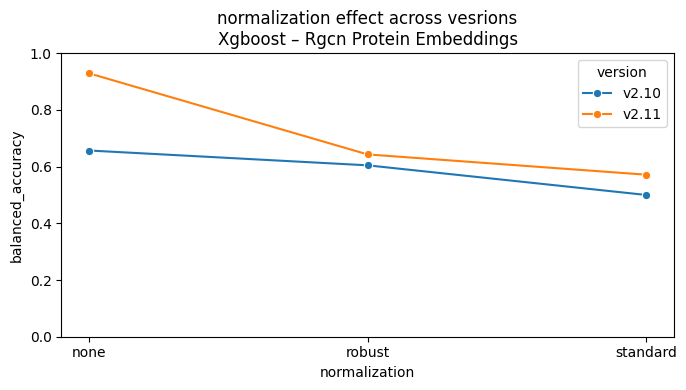

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

metric='balanced_accuracy'

for model in df['model'].unique():
    for dataset in df['input'].unique():
        subset = df[
            (df["model"] == model) &
            (df["input"] == dataset)
        ]

        plt.figure(figsize=(7,4))
        sns.lineplot(
            data=subset,
            x="normalization",
            y=metric,
            hue="version",
            marker="o"
        )

        plt.ylabel(metric)
        plt.xlabel("normalization")
        plt.title(f"normalization effect across vesrions\n{model.replace('_',' ').title()} – {dataset.replace('_',' ').title()}")
        plt.ylim(0, 1)

        plt.tight_layout()
        plt.show()

### Viz

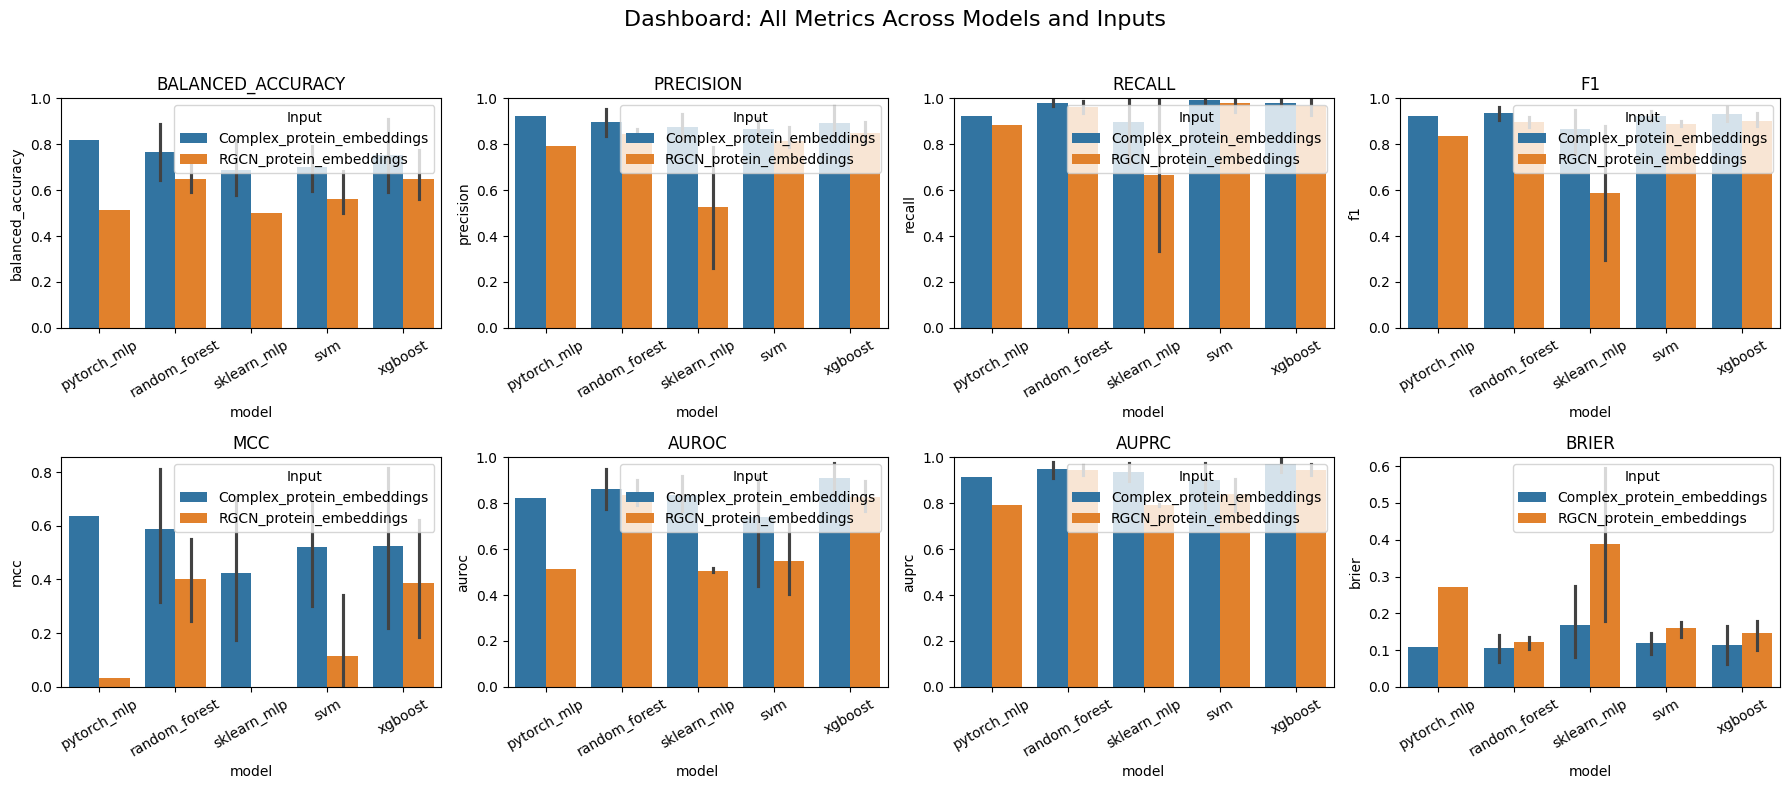

In [70]:
collector = ResultsCollector()
dashboard = DashboardVisualizer(temp_df, collector)
dashboard.plot_metric_grid()


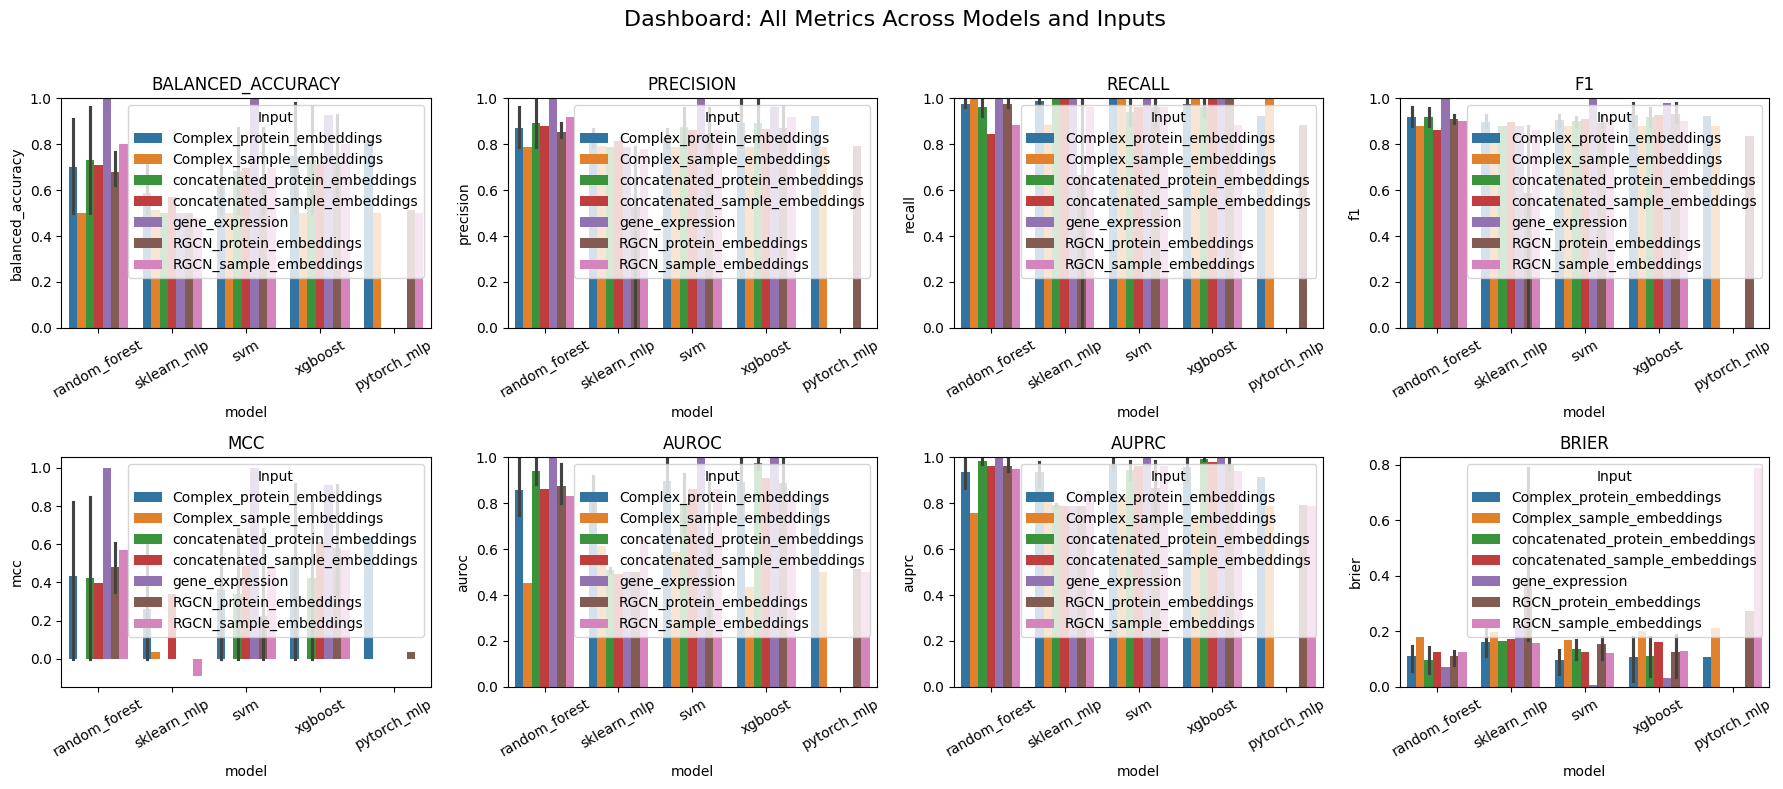

ValueError: x and y must have same first dimension, but have shapes (9,) and (25,)

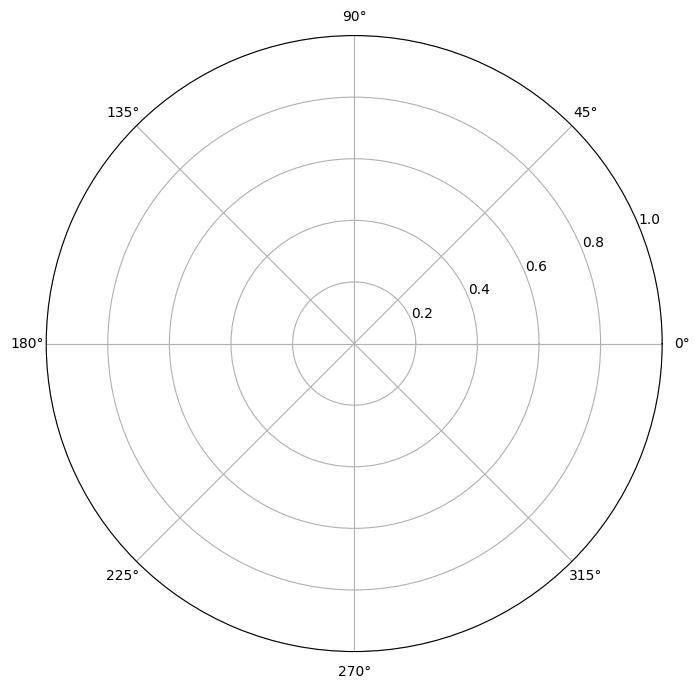

In [95]:
dashboard = DashboardVisualizer(results, collector)
dashboard.plot_metric_grid()
dashboard.plot_radar()
dashboard.plot_roc_curves()
dashboard.plot_pr_curves()